For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [507]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [508]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [509]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

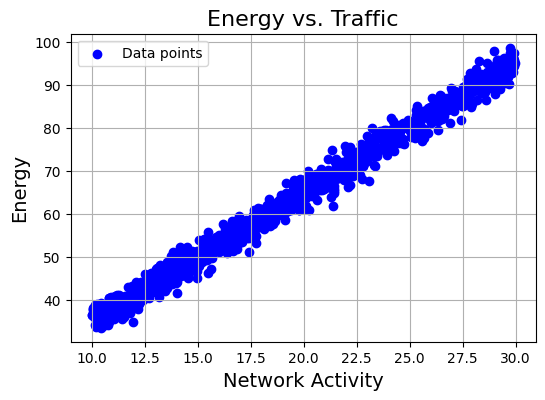

In [510]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

In [511]:
lr = LinearRegression()

lr.fit(data['Net_Activity'], data['Energy'], 10000)

lr.predict(data['Net_Activity'])

0      95.852447
1      59.597634
2      95.771148
3      33.002534
4      96.405392
         ...    
995    32.794113
996    46.365746
997    88.177694
998    64.918594
999    42.412447
Name: Net_Activity, Length: 1000, dtype: float64

#### Mission 1 Discussion

After performing the fit function, I get the following linear regression (energy consumption) formula

In [512]:
print("Final formula:", lr.get_formula(5))

# Estimate RMSE
y_pred = lr.predict(data['Net_Activity'])
print("RMSE:", lr.rmse(y_pred, data['Energy']))

Final formula: y = 3.19695x + 0.81379
RMSE: 2.2852970246381803


We see that this linear regression fits the Data quite well

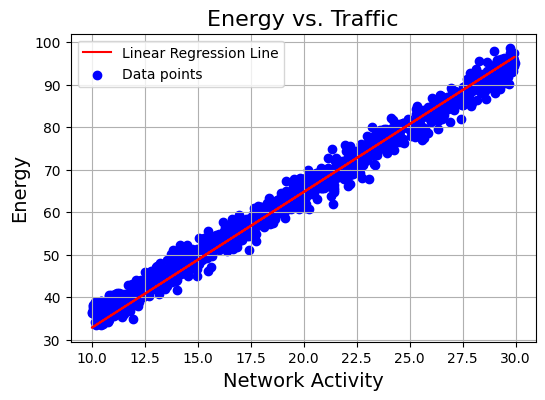

In [513]:
# Load data
plt.figure(figsize=(6, 4))
plt.plot(data['Net_Activity'], lr.predict(data['Net_Activity']), color='red', label='Linear Regression Line')
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

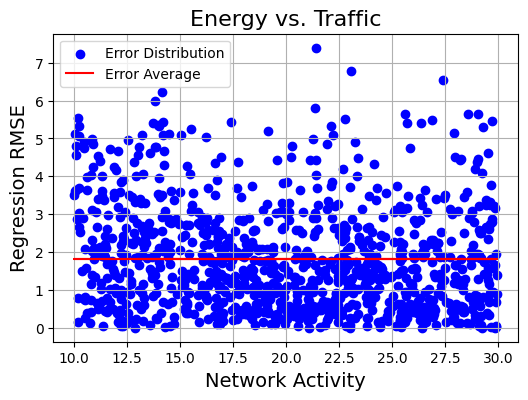

In [514]:
# Load data
data = pd.read_csv('mission1.csv')
error = lr.get_error_distribution(data['Net_Activity'], data['Energy'])

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], error, color='blue', label='Error Distribution')
plt.plot(data['Net_Activity'], np.full_like(error, np.average(error), dtype=float), color='red', label='Error Average')
plt.plot
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Regression RMSE', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

An unbiased estimator is an estimator that has an average estimation equating the true value. Aka one that on average, gives the correct estimation, with an average Error distribution of 0, or atleast very close. As we see with the plot above, we see that our estimator is not unbiased as it's average RMSE is closer to 2, rather than 0

## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [515]:
from log_regression import LogRegression
import sklearn.tree as tree

In [516]:
data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

train_x = train.iloc[:, :-2]
test_x = test.iloc[:, :-2]

train_y = train.iloc[:, -2]
test_y = test.iloc[:, -2]

lg = LogRegression(degrees=2)

In [517]:
print(train_x, train_y)

           x0        x1
0    0.377044  0.587023
1   -1.222865  1.514124
2   -0.036282 -1.562136
3   -1.217459  0.151372
4    0.072188  0.503239
..        ...       ...
495 -0.796331  1.795741
496  0.279699 -0.572485
497  0.648313 -1.974123
498  0.672983 -0.449303
499  0.867427  0.253261

[500 rows x 2 columns] 0      0.0
1      1.0
2      0.0
3      1.0
4      0.0
      ... 
495    1.0
496    1.0
497    1.0
498    1.0
499    0.0
Name: y, Length: 500, dtype: float64


In [ ]:
lg.fit(train_x, train_y, lr=1e-4, epoch=500000, verbose=True)

lg.measure_accuracy(test_x, test_y, tresh=0.5, plot_roc=True)

Epoch 0: cost=0.6945
Epoch 50000: cost=0.5388
Epoch 100000: cost=0.4995
Epoch 150000: cost=0.4812


In [ ]:
from sklearn.metrics import accuracy_score

decitionTree = tree.DecisionTreeClassifier()
decitionTree.fit(train_x, train_y)
accuracy_score(test_y, decitionTree.predict(test_x, True))

0.876

## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn import tree, ensemble

In [ ]:
def predict_even_odd(data):
    return np.round(data).astype(int)

def my_binary(data):
    return ((data * 1000) % 2).astype(int)

def preprocess(data, csv=False):
    out = pd.DataFrame()

    for col in data:
        col_data = data[col].to_numpy()
        col_data_rounded = my_binary(col_data)
        out.insert(loc=0, column=col, value=col_data_rounded)

    if csv:
        out.to_csv("out.csv", index=False)

    return out


In [ ]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

# Features = original continuous
x_train = preprocess(train.drop(['target'], axis=1))
x_test = preprocess(test.drop(['target'], axis=1))

# Labels = binary even/odd values
y_train = train[['target']].to_numpy()
y_test = test[['target']].to_numpy()

In [ ]:
print("Train stream_1:", x_train[["data_stream_1"]].sum().to_numpy()[0], " / ", len(x_train))
print("Train stream_3:", x_train[["data_stream_3"]].sum().to_numpy()[0], " / ", len(x_train))
print("Train Target:  ", y_train.sum(), " / ", len(x_train))
print("Train stream_1:", x_test[["data_stream_1"]].sum().to_numpy()[0], " / ", len(x_test))
print("Train stream_3: ", x_test[["data_stream_3"]].sum().to_numpy()[0], " / ", len(y_test))
print("Test Test:      ", y_test.sum(), " / ", len(y_test))

Train stream_1: 4011  /  8000
Train stream_3: 3976  /  8000
Train Target:   1542  /  8000
Train stream_1: 1008  /  2000
Train stream_3:  979  /  2000
Test Test:       386  /  2000


We see that data_stream_3 better correlates to the Train and Test dataset, but there is still an ~2/5 difference

Accuracy for col 3: 0.8070


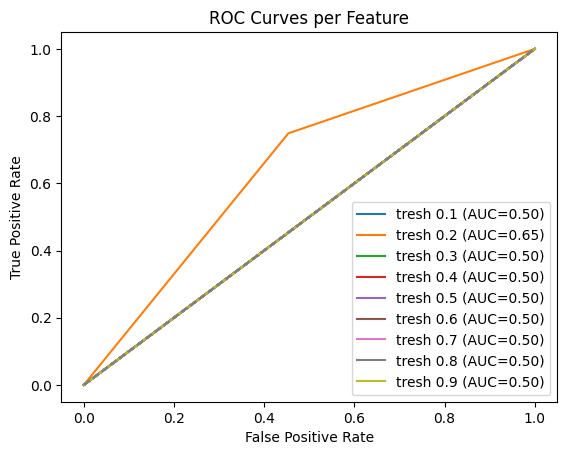

In [ ]:
decisionTree = tree.DecisionTreeClassifier(
    random_state=42,
    max_depth=6,
    min_samples_leaf=5,
)

x_train = x_train[["data_stream_3"]]
x_test = x_test[["data_stream_3"]]

# Train the model
decisionTree.fit(x_train, y_train)

# Predict hard labels
pred_y = decisionTree.predict(x_test)
acc = accuracy_score(y_test, pred_y)
print(f"Accuracy for col 3: {acc:.4f}")

for tresh in range(1, 10):
    tresh /= 10
    pred_probs = decisionTree.predict_proba(x_test)[:, 1]
    pred_rounded = (pred_probs > tresh).astype(int)
    auc = roc_auc_score(y_test, pred_rounded)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, pred_rounded)
    plt.plot(fpr, tpr, label=f"tresh {tresh:.1f} (AUC={auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves per Feature")
plt.legend()
plt.show()


In [ ]:
decisionForest = ensemble.RandomForestClassifier(random_state=42, n_estimators=100)

x_train = x_train[["data_stream_3"]]
x_test = x_test[["data_stream_3"]]

# Train the model
decisionForest.fit(x_train, y_train)

# Predict hard labels
pred_y = decisionForest.predict(x_test)
acc = accuracy_score(y_test, pred_y)
print(f"Accuracy for col 3: {acc:.4f}")

for tresh in range(1, 10):
    tresh /= 10
    pred_probs = decisionForest.predict_proba(x_test)[:, 1]
    pred_rounded = (pred_probs > tresh).astype(int)
    auc = roc_auc_score(y_test, pred_rounded)

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, pred_rounded)
    plt.plot(fpr, tpr, label=f"tresh {tresh:.1f} (AUC={auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves per Feature")
plt.legend()
plt.show()


NameError: name 'ensemble' is not defined

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [ ]:
from sklearn.model_selection import train_test_split
from energy_regression import EnsembleRegressor

In [ ]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

In [ ]:
print(train.shape)
print(test.shape)

(23285, 17)
(9937, 17)


23556173.4710758
75.14421857703533


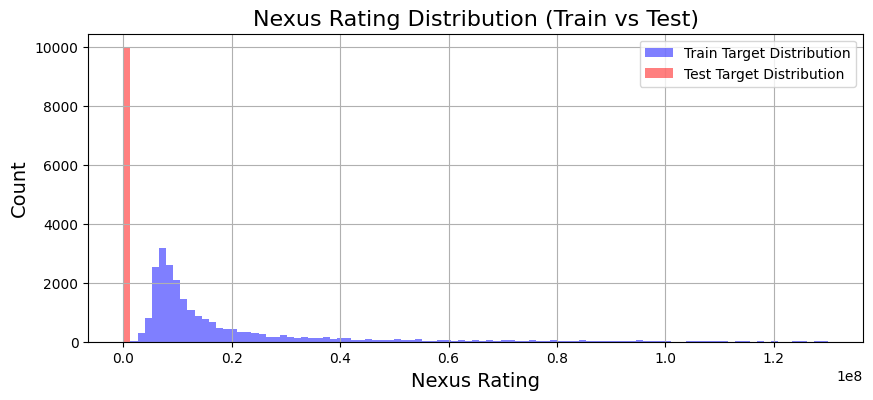

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

train_target = train['nexus_rating']
test_target = test['nexus_rating']

# Define shared bins
bins = np.linspace(
    min(train_target.min(), test_target.min()),
    max(train_target.max(), test_target.max()) / 20,
    100
)

# Plot both on same axis
train_target.hist(bins=bins, ax=ax, color='blue', alpha=0.5, label='Train Target Distribution')
test_target.hist(bins=bins, ax=ax, color='red', alpha=0.5, label='Test Target Distribution')

print(np.mean(train_target))
print(np.mean(test_target))

# Titles and labels
ax.set_title('Nexus Rating Distribution (Train vs Test)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend()

plt.show()


### Fix issue with non-even spread of target between training and test

In [ ]:
total = pd.concat([train, test])
total = total.fillna(test.median())

target = total['nexus_rating']
features = total.drop(columns=['nexus_rating'])

# We normalize the values
features_norm = (features - features.min()) / (features.max() - features.min())

X_train, X_test, y_train, y_test = train_test_split(features_norm,
                                                    target,
                                                    test_size=0.2,
                                                    random_state=42)

16422960.269169958
16859778.917738147


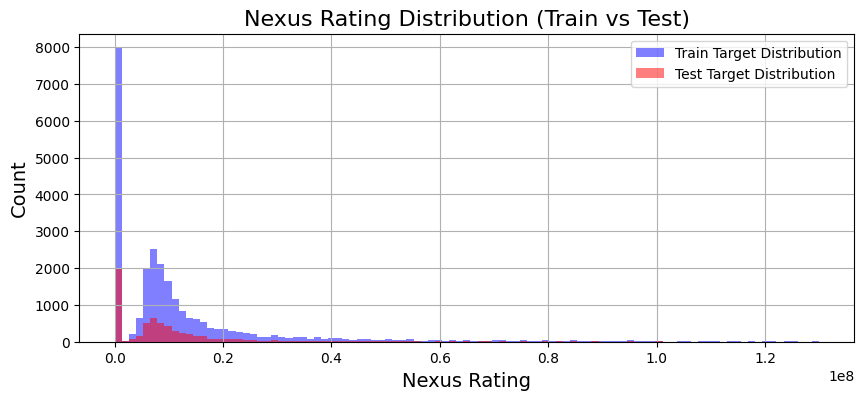

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

train_target = pd.Series(y_train)
test_target = pd.Series(y_test)

# Define shared bins
bins = np.linspace(
    min(train_target.min(), test_target.min()),
    max(train_target.max(), test_target.max()) / 20,
    100
)

# Plot both on same axis
train_target.hist(bins=bins, ax=ax, color='blue', alpha=0.5, label='Train Target Distribution')
test_target.hist(bins=bins, ax=ax, color='red', alpha=0.5, label='Test Target Distribution')

print(np.mean(train_target))
print(np.mean(test_target))

# Titles and labels
ax.set_title('Nexus Rating Distribution (Train vs Test)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend()

plt.show()


### Train model

Epoch 0 (lr 0.1000): MSE=44465274.4491
Epoch 20 (lr 0.0900): MSE=37064709.3706
Epoch 40 (lr 0.0800): MSE=35446907.8997
Epoch 60 (lr 0.0700): MSE=34627065.9857
Epoch 80 (lr 0.0600): MSE=34174992.2593
Epoch 100 (lr 0.0500): MSE=33907469.7679
Epoch 120 (lr 0.0400): MSE=33740759.5752
Epoch 140 (lr 0.0300): MSE=33634408.9919
Epoch 160 (lr 0.0200): MSE=33568051.1744
Epoch 180 (lr 0.0100): MSE=33531287.5624


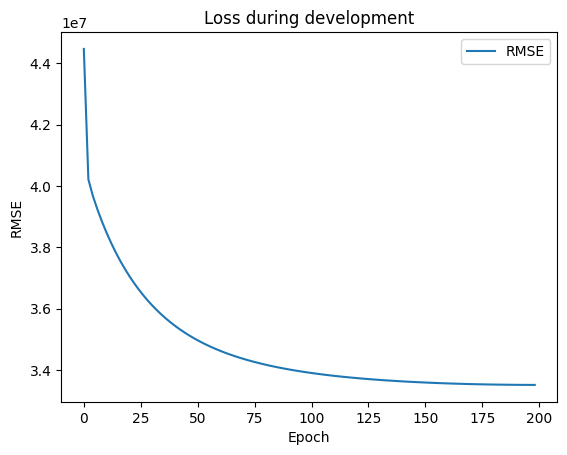

In [ ]:
regressor = EnsembleRegressor(degrees=2)
regressor.fit(X_train, y_train, lr=1e-1, min_lr=1e-5, epoch=200, verbose=True, plot_loss=True) #20000
y_pred = regressor.predict(X_test)

In [ ]:
print(y_test[:5])
print(y_pred[:5])

2222     6300000.0
3233         135.0
1866     8280272.0
19487    8500000.0
4148     9980000.0
Name: nexus_rating, dtype: float64
[2765298.83355101 5317326.87161298 4479744.58910464 9630978.89856607
 6909160.32670197]


In [ ]:
# Example rmsle check
print('RMSLE: ', regressor.rmsle(y_test, y_pred.clip(0)))
print('Required RMSLE: ', 0.294)

RMSLE:  6.472908780460366
Required RMSLE:  0.294
